In [1]:
from copy import deepcopy

from glob import glob
from typing import List, Tuple, Optional, Callable, Mapping, Any

import pandas as pd
import numpy as np
import cv2

from matplotlib import pyplot as plt 
from skimage import filters

%matplotlib inline

In /home/vsydorskyi/anaconda3/envs/venv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/vsydorskyi/anaconda3/envs/venv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/vsydorskyi/anaconda3/envs/venv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/vsydorskyi/anaconda3/envs/venv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /

## Read data

In [2]:
def read_one_image(
    image_name: str,
    resize_shape: Optional[Tuple[int, int]] = None
):
    image = cv2.imread(image_name)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    print(f"Initial size : {image.shape}")
    if resize_shape is not None:
        image = cv2.resize(image, resize_shape)
    return image

def read_images(
    image_names: List[str],
    resize_shape: Optional[Tuple[int, int]] = None
):
    images = [read_one_image(el, resize_shape) for el in image_names]
    if resize_shape is not None:
        images = np.stack(images)
    return images

['data/здание.jpg', 'data/Без названия.jpg', 'data/рентген.jpg', 'data/вишня.jpg']
Initial size : (183, 275, 3)
Initial size : (183, 275, 3)
Initial size : (222, 227, 3)
Initial size : (207, 244, 3)


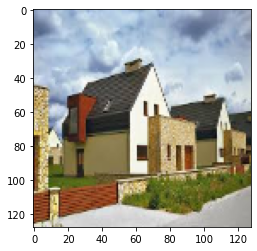

In [3]:
filenames = glob('data/*.jpg')
print(filenames)

all_images = read_images(filenames, (128,128))
plt.imshow(all_images[0]);

## Canny

In [4]:
max_lowThreshold = 100
ratio = 3
kernel_size = 3
low_threshold = 0

def canny_alg(input):
    src_gray = cv2.cvtColor(input, cv2.COLOR_RGB2GRAY)
    img_blur = cv2.blur(src_gray, (3,3))
    detected_edges = cv2.Canny(img_blur, low_threshold, low_threshold*ratio, kernel_size)
    #mask = detected_edges != 0
    #dst = input * (mask[:,:,None].astype(input.dtype))
    return detected_edges

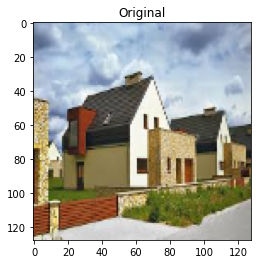

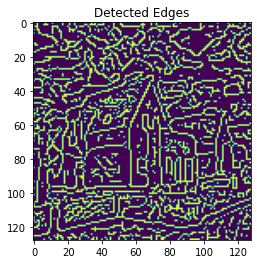

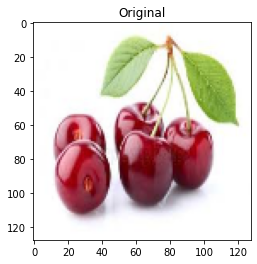

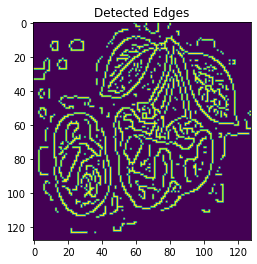

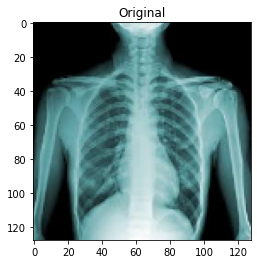

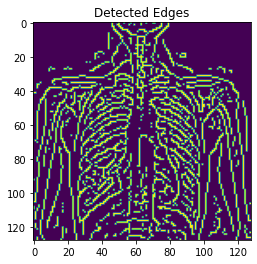

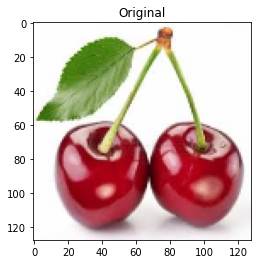

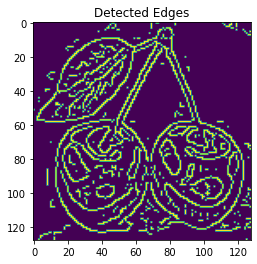

In [5]:
for im in all_images:
    plt.title("Original")
    plt.imshow(im)
    plt.show()
    
    plt.title("Detected Edges")
    plt.imshow(canny_alg(im));
    plt.show()

## Sobel

In [6]:
def sobel_alg(input):
    
    
    gray = cv2.cvtColor(input, cv2.COLOR_RGB2GRAY)
    
    gray = cv2.GaussianBlur(gray, (3, 3), 0)
    
    probs = filters.sobel(gray)
    #mask = probs > grad_thresh
    
    #dst = input * (mask[:,:,None].astype(input.dtype))
    
    return probs

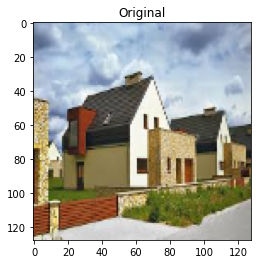

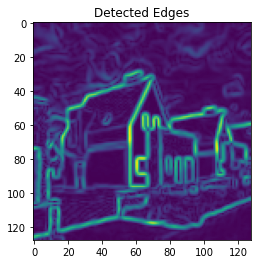

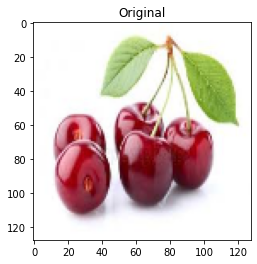

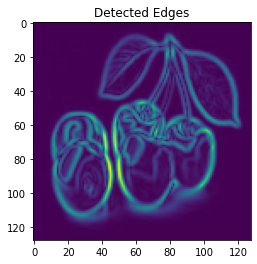

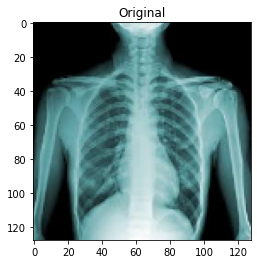

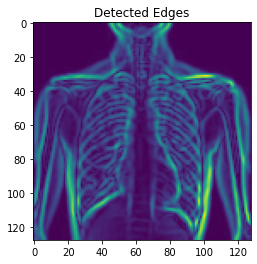

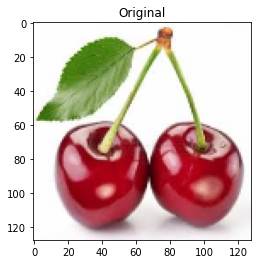

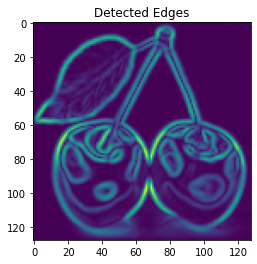

In [7]:
for im in all_images:
    plt.title("Original")
    plt.imshow(im)
    plt.show()
    
    plt.title("Detected Edges")
    plt.imshow(sobel_alg(im));
    plt.show()

## Laplace

In [8]:
def laplace_alg(input):
    
    src_gray = cv2.cvtColor(input, cv2.COLOR_RGB2GRAY)
    src_gray = cv2.GaussianBlur(src_gray, (3, 3), 0)
    
    probs = filters.laplace(src_gray)
        
    #mask = abs_dst > laplace_thresh
    #dst = input * (mask[:,:,None].astype(input.dtype))
    
    return probs

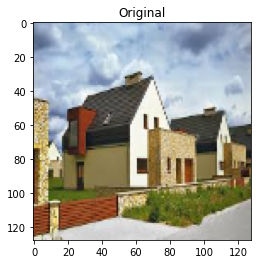

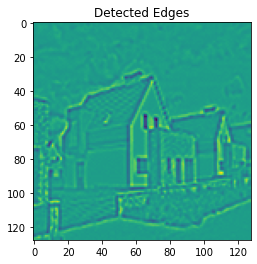

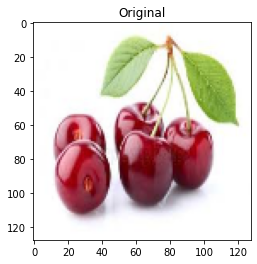

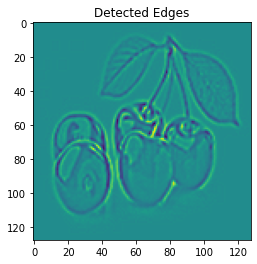

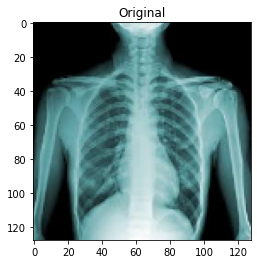

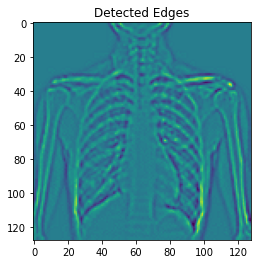

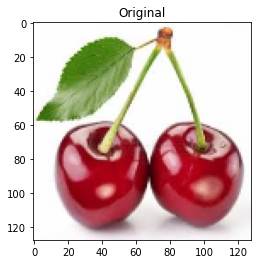

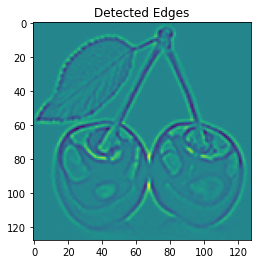

In [9]:
for im in all_images:
    plt.title("Original")
    plt.imshow(im)
    plt.show()
    
    plt.title("Detected Edges")
    plt.imshow(laplace_alg(im));
    plt.show()

## Roberts

In [10]:
def roberts_alg(input):
    
    src_gray = cv2.cvtColor(input, cv2.COLOR_RGB2GRAY)
    src_gray = cv2.GaussianBlur(src_gray, (3, 3), 0)
    
    probs = filters.roberts(src_gray)
        
    #mask = abs_dst > laplace_thresh
    #dst = input * (mask[:,:,None].astype(input.dtype))
    
    return probs

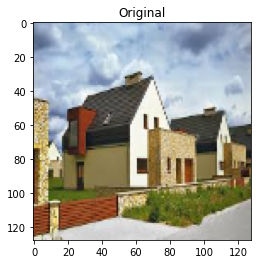

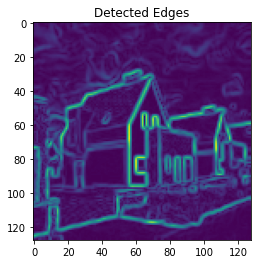

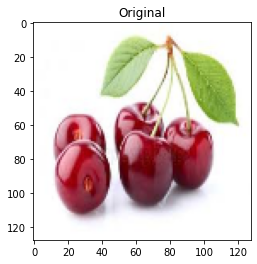

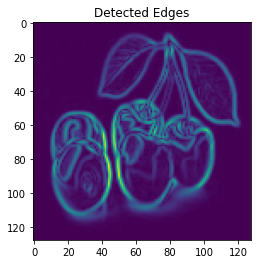

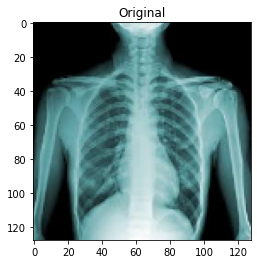

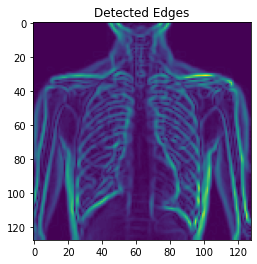

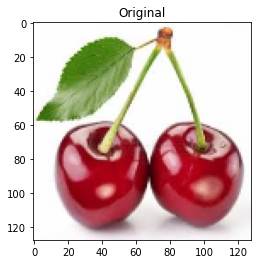

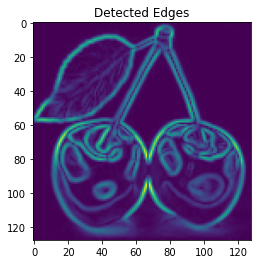

In [11]:
for im in all_images:
    plt.title("Original")
    plt.imshow(im)
    plt.show()
    
    plt.title("Detected Edges")
    plt.imshow(roberts_alg(im));
    plt.show()

## Prewitt

In [12]:
def prewitt_alg(input):
    
    src_gray = cv2.cvtColor(input, cv2.COLOR_RGB2GRAY)
    src_gray = cv2.GaussianBlur(src_gray, (3, 3), 0)
    
    probs = filters.prewitt(src_gray)
        
    #mask = abs_dst > laplace_thresh
    #dst = input * (mask[:,:,None].astype(input.dtype))
    
    return probs

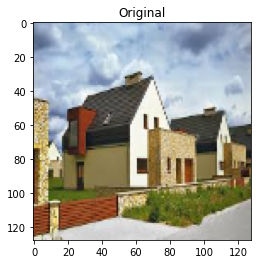

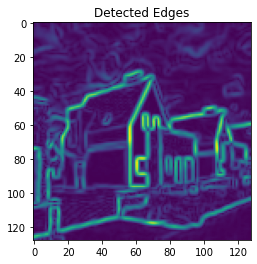

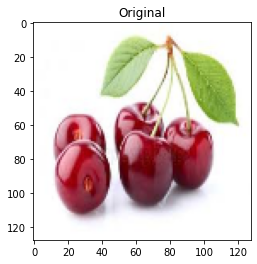

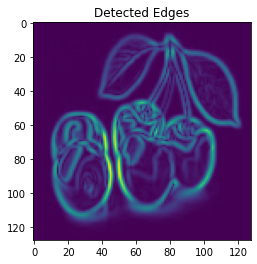

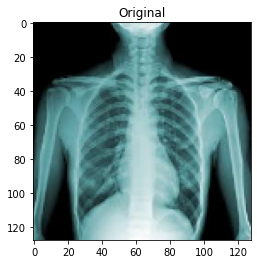

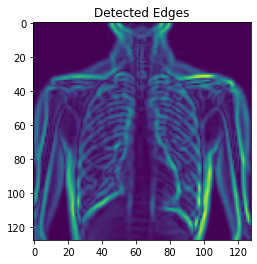

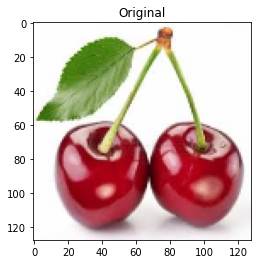

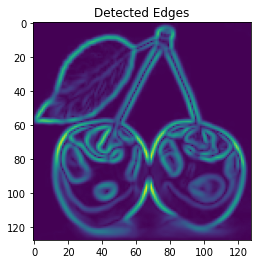

In [13]:
for im in all_images:
    plt.title("Original")
    plt.imshow(im)
    plt.show()
    
    plt.title("Detected Edges")
    plt.imshow(prewitt_alg(im));
    plt.show()

## HED

In [14]:
class CropLayer(object):
    def __init__(self, params, blobs):
        self.xstart = 0
        self.xend = 0
        self.ystart = 0
        self.yend = 0

    # Our layer receives two inputs. We need to crop the first input blob
    # to match a shape of the second one (keeping batch size and number of channels)
    def getMemoryShapes(self, inputs):
        inputShape, targetShape = inputs[0], inputs[1]
        batchSize, numChannels = inputShape[0], inputShape[1]
        height, width = targetShape[2], targetShape[3]

        self.ystart = int((inputShape[2] - targetShape[2]) / 2)
        self.xstart = int((inputShape[3] - targetShape[3]) / 2)
        self.yend = self.ystart + height
        self.xend = self.xstart + width

        return [[batchSize, numChannels, height, width]]

    def forward(self, inputs):
        return [inputs[0][:,:,self.ystart:self.yend,self.xstart:self.xend]]
    
NET = cv2.dnn.readNetFromCaffe('model_data/deploy.prototxt', 'model_data/hed_pretrained_bsds.caffemodel')
cv2.dnn_registerLayer('Crop', CropLayer)

In [15]:
def hed_alg(input):

    # Load the model.
    input = cv2.cvtColor(input, cv2.COLOR_RGB2BGR)

    inp = cv2.dnn.blobFromImage(input, scalefactor=1.0, size=(300, 300),
                               mean=(104.00698793, 116.66876762, 122.67891434),
                               swapRB=False, crop=False)
    NET.setInput(inp)
    # edges = cv.Canny(image,image.shape[1],image.shape[0])
    out = NET.forward()

    out = out[0, 0]
    out = cv2.resize(out, (input.shape[1], input.shape[0]))
    return out

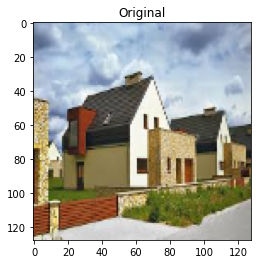

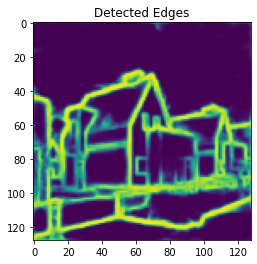

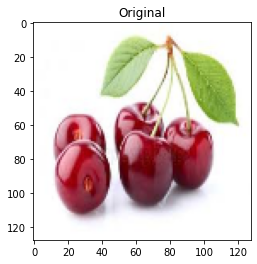

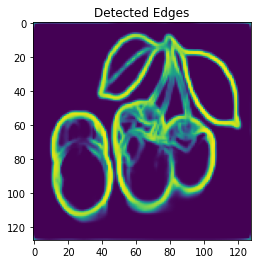

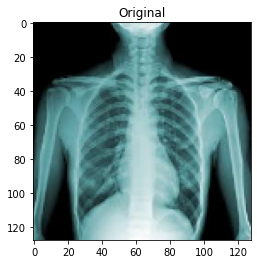

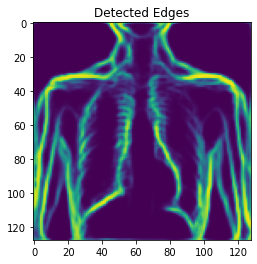

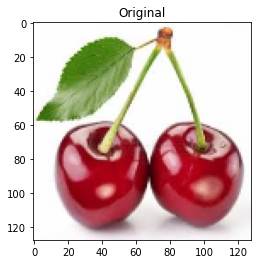

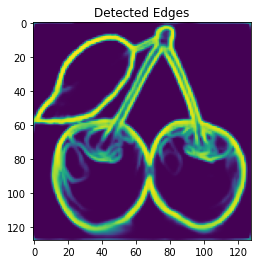

In [16]:
for im in all_images:
    plt.title("Original")
    plt.imshow(im)
    plt.show()
    
    plt.title("Detected Edges")
    plt.imshow(hed_alg(im));
    plt.show()